In [4]:
from mocapact import observables
from mocapact.sb3 import utils
from mocapact.envs import tracking
from dm_control.locomotion.tasks.reference_pose import types

In [5]:
from IPython.display import HTML
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def visualize_images(images, show=True, to_file = None):
    fig, ax = plt.subplots()
    x = ax.imshow(images[0])

    def update(frame):
        x.set_data(images[frame])
        return x

    ani = FuncAnimation(fig, update, frames=range(len(images)), interval=50)
    if to_file is not None:
        ani.save(to_file, writer='imagemagick', fps=30)
    if show:
        display(HTML(ani.to_html5_video()))
    plt.close()

In [6]:
def get_speed(task, physics):
    xvel = task._walker.observables.torso_xvel(physics)
    yvel = task._walker.observables.torso_yvel(physics)
    speed = np.linalg.norm(np.array([xvel, yvel]))
    return speed

last_possible_start:  591
True
last_possible_start:  591
True


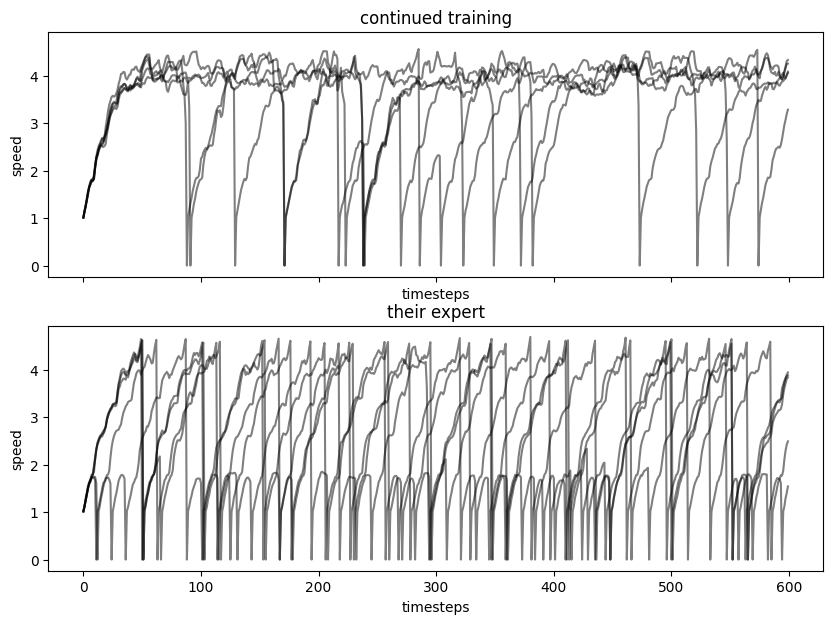

In [8]:
paths = {
    "continued training": "./xpert_rl/walk_warm_400steps/CMU_016_55-0-149/0/eval_start/model",
    "their expert": "../data/experts/CMU_016_55-0-47/eval_rsi/model",
}

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 7))
n_runs = 5
max_steps = 600
speeds_model = []
for plt_idx, (name, expert_path) in enumerate(paths.items()):
    expert = utils.load_policy(expert_path, observables.TIME_INDEX_OBSERVABLES)

    dataset = types.ClipCollection(ids=['CMU_016_55'])
    env = tracking.MocapTrackingGymEnvRunHack(dataset,act_noise=0.1,task_kwargs=dict(
        reward_type='comic',
        min_steps=9,
        ghost_offset=np.array([1., 0., 0.]),
        always_init_at_clip_start=True,
        termination_error_threshold=0.3
    ))
    speeds = []
    for _ in range(n_runs):
        obs, done = env.reset(), False
        
        ims = []
        speed = []
        for _ in range(max_steps):
            action, _ = expert.predict(obs, deterministic=True)
            obs, rew, done, _ = env.step(action)
            # ims.append(env.render())
            speed.append(get_speed(env._env.task, env._env.physics))
        speeds.append(speed)
        
    axs[plt_idx].set_title(name)
    axs[plt_idx].set_ylabel("speed")
    axs[plt_idx].set_xlabel("timesteps")
    for speed in speeds:
        speed = np.array(speed)
        axs[plt_idx].plot(speed,c="k",alpha=0.5)
plt.show()

last_possible_start:  591
True


/home/mirko/anaconda3/envs/MoCapActRunHack/lib/python3.8/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: an integer is required (got type bytes)
  warnings.warn(


last_possible_start:  591
True


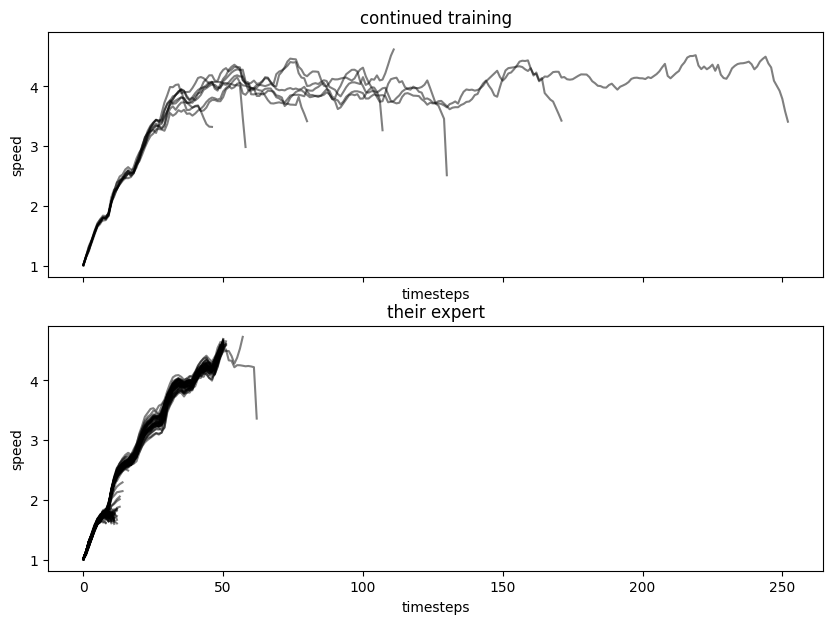

In [10]:
paths = {
    "continued training": "./xpert_rl/walk_warm_400steps/CMU_016_55-0-149/0/eval_start/model",
    "their expert": "../data/experts/CMU_016_55-0-47/eval_rsi/model",
}

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 7))
n_runs = 5
max_steps = 600
speeds_model = []
for plt_idx, (name, expert_path) in enumerate(paths.items()):
    expert = utils.load_policy(expert_path, observables.TIME_INDEX_OBSERVABLES)

    dataset = types.ClipCollection(ids=['CMU_016_55'])
    env = tracking.MocapTrackingGymEnvRunHack(dataset,
                                              act_noise=0.1,
                                              task_kwargs=dict(
                                                reward_type='comic',
                                                min_steps=9,
                                                ghost_offset=np.array([1., 0., 0.]),
                                                always_init_at_clip_start=True,
                                                termination_error_threshold=0.3
                                            ))
    speeds = []
    for _ in range(n_runs):
        obs, done = env.reset(), False
        
        ims = []
        speed = []
        for _ in range(max_steps):
            action, _ = expert.predict(obs, deterministic=True)
            obs, rew, done, _ = env.step(action)
            # ims.append(env.render())
            speed.append(get_speed(env._env.task, env._env.physics))
        speeds.append(speed)
        
    axs[plt_idx].set_title(name)
    axs[plt_idx].set_ylabel("speed")
    axs[plt_idx].set_xlabel("timesteps")
    for speed in speeds:
        speed = np.array(speed)
        idx = np.where(speed == 0)[0]+1
        for i in range(0,len(idx)-1):
            axs[plt_idx].plot(speed[idx[i]:idx[i+1]-1],c="k",alpha=0.5)
    speeds_model.append(speeds)
plt.show()

(2, 5, 600)


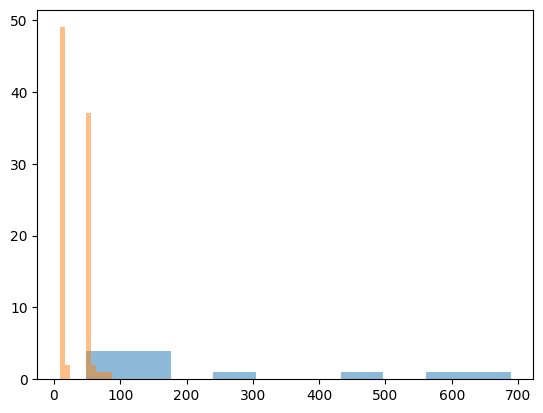

In [11]:
speeds_model = np.array(speeds_model)
print(speeds_model.shape)
for i in range(2):
    speed = speeds_model[i,:,:]
    speed = speed.flatten()
    idx = np.where(speed == 0)
    diff = np.diff(idx)[0]
    plt.hist(diff,alpha=0.5)

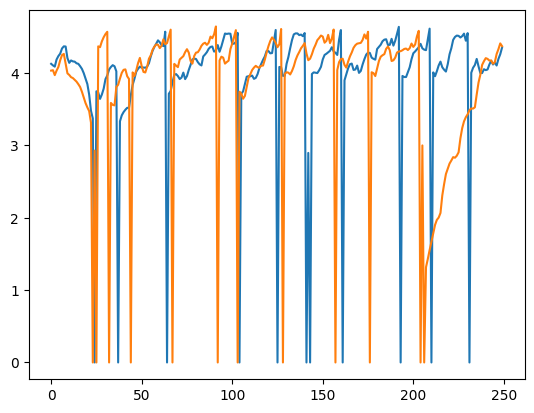

In [9]:
for speed in speeds:
    plt.plot(speed)
plt.show()

In [11]:
visualize_images(ims)